# Identifying Precise Forecasters on r/Wallstreetbets
**BrainStation Data Science Bootcamp - Capstone Project**

**Author: L Gavrilova**

**Date: 15 October 2023**

# Notebook 1 - Data Cleaning and EDA - DRAFT

## Table of Contents

1. [Introduction](#1.-Introduction)
    - Objective of project
    - What potential business value does this project bring?
    - How will this project help/have an impact <br>
    
2. [Data Collection](#2.-Data-Collection)
    - Source of the data
    - Data dictionary <br>
    
3. [Data Wrangling](#3.-Data-Wrangling)
    - Load the data
    - Data Cleaning
        - [Duplicates removal](### Duplicates removal) <br>
        
4. [EDA](#4.-EDA)
    - Data Distribution <br>
    Univariate Analsys
    Bivariate analysis

    
5. [Conclusion](#5.-Conclusion)

## 1. Introduction

### Objective of project:

I want to explore whether ML and NLP techniques can be used to ease the task of identifying and ranking “smart” social media accounts (the “Precise Forecasters”).  


### What potential business value does this project bring?

This project aims to augment decision-making process for various investors, especially small retail investors that dont have access to AI tools used by larger funds. There is a lot of noise on social networks, but there are also some very smart people sharing there ideas, and if we can separate noise from signal that would be extremely helpful. 

### How will this project help/have an impact:

- Help to identify “smart money” and “dumb money”
- Can be used to build a real-time trading strategy 
- This project has a potential to influence a multi-trillion-dollar capital markets and make them more efficient in allocating capital, making society more prosperous.
 

---
## 2. Data Collection

#### Source of the data

https://www.kaggle.com/datasets/leukipp/reddit-finance-data

I chose this dataset as it contains the field 'author', many other datasets focused on r/Wallstreetbets have that column removed.  The data covers period between Jan to Dec 2021. 

Instructions on downloading the dataset from kaggle:

1. Unzip the file.
2. There is one common folder named. It contains 14 subfolders, one for each subreddit. 
3. Each subfolder is named according to the subreddit it represents. Each subfolder contains two files.
4. Collect all .cvs files in one directory and concatenate them vertically. A new column is added in the process with the name of the subreddit. 

#### Data dictionary  


| Column Name            |   Data Type        |  Description                     |
|:----------------------:|:------------------:|----------------------------------|
|           id          |              string             |      The id of the submission        |
|    author   | (string)   | The redditors username  |
|    created   | (datetime)  |  Time the submission was created.
|    retrieved  |  (datetime  |  Time the submission was retrieved. |
|    edited  |  (datetime)  | Time the submission was modified. |
|    pinned   | (integer)  |  Whether or not the submission is pinned. |
|    archived   | (integer)  |  Whether or not the submission is archived.
|    locked   | (integer)  |  Whether or not the submission is locked.
|    removed  |  (integer)  |  Whether or not the submission is mod removed.
|    deleted  |  (integer)  |  Whether or not the submission is user deleted.
|    is_self   | (integer)  |  Whether or not the submission is a text.
|    is_video  |  (integer)  |  Whether or not the submission is a video.
|    is_original_content   | (integer)  |  Whether or not the submission has been set as original content.
|    title   | (string)  |  The title of the submission.
|    link_flair_text   | (string)  |  The submission link flairs text content.
|    upvote_ratio   | (number)  |  The percentage of upvotes from all votes on the submission.
|    score   | (integer)  |    The number of upvotes for the submission. |
|    gilded   | (integer)  |  The number of gilded awards on the submission.
|    total_awards_received  |  (integer)  |  The number of awards on the submission.
|    num_comments   | (integer)  |  The number of comments on the submission.
|    num_crossposts   | (integer)  |  The number of crossposts on the submission.
|    selftext   | (string)  |  The submission selftext on text posts.
|    thumbnail   |  (string)  |  The submission thumbnail on image posts.
|    shortlink    | (string)  |  The submission short url.

---
## 3 - Data Wrangling

### Data Loading

In [1]:
# Importing several libraries
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6.0, 4.0) #setting figure size
import seaborn as sns
import matplotlib.dates as mdates
import os
import emoji
import re

In [2]:
DATAFILE = '../data/merged_data.csv'

In [3]:
df = pd.read_csv(DATAFILE)

/var/folders/j6/lnskfknd3zz28plgqdh6w_4m0000gn/T/ipykernel_24592/2709059952.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATAFILE)


In [4]:
# determine the shape of the database:
df.shape

(1500797, 25)

In [5]:
df.head(1).T

,0
id,ko4pii
author,[deleted]
created,2021-01-01 04:08:51
retrieved,2021-02-28 16:51:20
edited,1970-01-01 00:00:00
pinned,0
archived,0
locked,0
removed,1
deleted,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500797 entries, 0 to 1500796
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1500797 non-null  object 
 1   author                 1500797 non-null  object 
 2   created                1500797 non-null  object 
 3   retrieved              1500797 non-null  object 
 4   edited                 1500797 non-null  object 
 5   pinned                 1500797 non-null  int64  
 6   archived               1500797 non-null  int64  
 7   locked                 1500797 non-null  int64  
 8   removed                1500797 non-null  int64  
 9   deleted                1500797 non-null  int64  
 10  is_self                1500797 non-null  int64  
 11  is_video               1500797 non-null  int64  
 12  is_original_content    1500797 non-null  int64  
 13  title                  1500792 non-null  object 
 14  link_flair_text   

All columns have the expected datatype, other than the date ('created'), so I will convert it into the datetime format:

In [7]:
# top 5 rows showing only 'object' columns
df.select_dtypes('object').sample(5)

,id,author,created,retrieved,edited,title,link_flair_text,selftext,thumbnail,shortlink,FolderName
155040,mhblmc,AspiringAdonis,2021-03-31 17:49:57,2021-04-01 00:06:49,1970-01-01 00:00:00,A Plea from the Silent Majority,💎🙌,"I don't post often. Like many, I lurk, occasio...",self,https://redd.it/mhblmc,gme
1197177,nu7pa0,RandyGAerialKing,2021-06-07 08:48:54,2021-06-07 15:07:19,1970-01-01 00:00:00,Question about Dividend paying stocks,Discussion,[removed],default,https://redd.it/nu7pa0,wallstreetbets
482156,l4p329,[deleted],2021-01-25 14:38:44,2021-02-28 17:01:29,1970-01-01 00:00:00,VYNE a pump and dump?,Discussion,[removed],default,https://redd.it/l4p329,robinhoodpennystocks
1373900,lda5lr,UtherofOstia,2021-02-05 15:57:53,2021-02-05 17:59:35,1970-01-01 00:00:00,So I think I've established a pretty solid bas...,Budgeting,So over the last 5-6 years since graduating fr...,self,https://redd.it/lda5lr,personalfinance
1352092,r4csjf,spicysneakers,2021-11-28 19:55:31,2021-11-29 03:39:00,1970-01-01 00:00:00,saw this license plate while driving through utah,Meme,NaN,default,https://redd.it/r4csjf,wallstreetbets


In [8]:
# Convert the date column from 'object' datatype into a 'datetime' datatype:
df['created'] = pd.to_datetime(df['created'])

In [9]:
# I also convert 'title' and 'selftext' into strings:
df['title'] = df['title'].astype(str)
df['selftext'] = df['selftext'].astype(str)

In [10]:
# Drop columns that have no interest for my analysis
columns_to_drop = ['is_original_content', 'thumbnail', 'retrieved', 'edited', 'archived', 'locked']
df = df.drop(columns=columns_to_drop)

Observations:

### Numerical fields

In [11]:
# Describe the numerical fields
df.describe().T

,count,mean,min,25%,50%,75%,max,std
created,1500797,2021-04-26 16:23:55.459887616,2021-01-01 00:02:06,2021-01-30 15:48:55,2021-03-17 14:36:21,2021-06-29 02:32:34,2021-12-31 23:59:44,NaN
pinned,1500797.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
removed,1500797.0,0.67152,0.0,0.0,1.0,1.0,1.0,0.469661
deleted,1500797.0,0.093035,0.0,0.0,0.0,0.0,1.0,0.290481
is_self,1500797.0,0.635847,0.0,0.0,1.0,1.0,1.0,0.481192
is_video,1500797.0,0.020428,0.0,0.0,0.0,0.0,1.0,0.141459
upvote_ratio,1500797.0,0.888534,0.0,0.84,1.0,1.0,1.0,0.188578
score,1500797.0,84.601988,0.0,1.0,1.0,6.0,299489.0,1638.558179
gilded,1500797.0,0.011112,0.0,0.0,0.0,0.0,292.0,0.392906
total_awards_received,1500797.0,0.498601,0.0,0.0,0.0,0.0,11491.0,19.804742


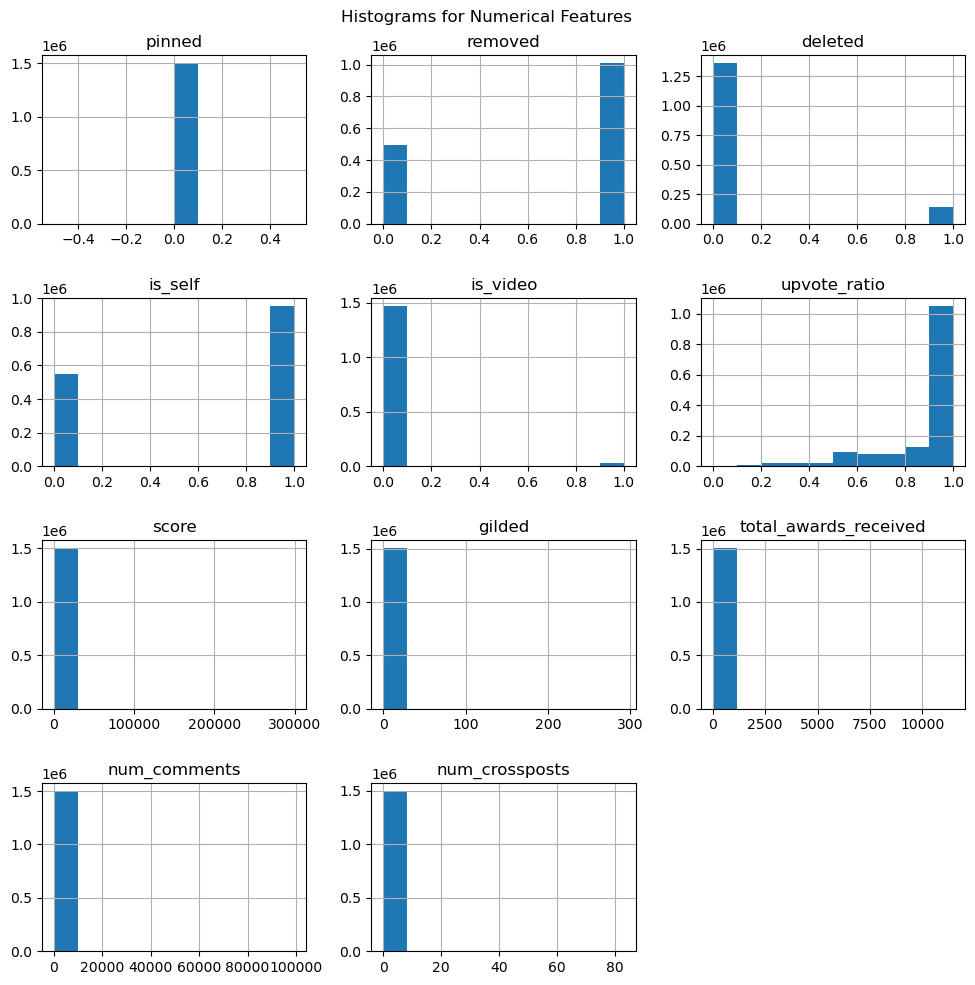

In [12]:
# Histograms for all numerical features:

df.select_dtypes(include=['int64', 'float64']).hist(figsize=(10,10))
plt.suptitle("Histograms for Numerical Features") 
# the suptitle places a centralized title above all the subplots. 
plt.tight_layout()
plt.show()

Observations: 

1. Score (the number of upvotes/likes): maximum value is 299489. Average is 84.  Very skewed distribution. 
2. Total awards receieved: max value = 11491, average 0.49, mean = 0.  Also very skewed distribution. 
3. Number of comments: max = 99346, mean = 18. Most posts have very low number of comments, but a small minority of them generates enormous number of comments. 
4. Deleted: 9.3% of records were subsequently deleted by the author (but we still have the text)
5. Removed: 67% of the records were removed by the moderators. This is a very high number.
6. is_video: 2% of records had video attached.
7. Upvote ratio: 89% of posts had more positive votes than negative, as most of them are >0.5.  A small minority of messages have rating <0.5 (more negatives than positives)

Overall, the data is very unevenly distributed with just a few posts receiving most of the attention (by number of comments, number of crossposts, score and awards received). We shoudl look into these top performers separately and maybe flag them as a special category.

### Categorical fields. Unique values

In [13]:
# Performing a .describe on the non-numeric columns
df.describe(include= 'object').T

,count,unique,top,freq
id,1500797,1500797,ko4pii,1
author,1500797,596401,[deleted],218784
title,1500797,1350669,AMC,1444
link_flair_text,1312512,372,Discussion,307477
selftext,1500797,303241,[removed],596869
shortlink,1500797,1500797,https://redd.it/ko4pii,1
FolderName,1500797,14,wallstreetbets,775326


In [14]:
# Value counts for all categorical fields:
print("\nValue counts for categorical fields:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {column}:")
    print(df[column].value_counts())


Value counts for categorical fields:

Value counts for id:
id
ko4pii    1
ljh86e    1
ljh6zj    1
ljh6ww    1
ljh6t7    1
         ..
p0nzul    1
p0n40f    1
p0mgte    1
p0krvm    1
rt6lul    1
Name: count, Length: 1500797, dtype: int64

Value counts for author:
author
[deleted]              218784
AutoModerator            2581
fintechinshorts          1090
Onboarding92              785
nmstanley32               642
                        ...  
Delicious-Dog7349           1
Semi-proletariat            1
TheBuilder16                1
Qwal77                      1
coyote_of_the_month         1
Name: count, Length: 596401, dtype: int64

Value counts for title:
title
AMC                                                                               1444
GME                                                                                923
Dogecoin                                                                           671
SNDL                                                             

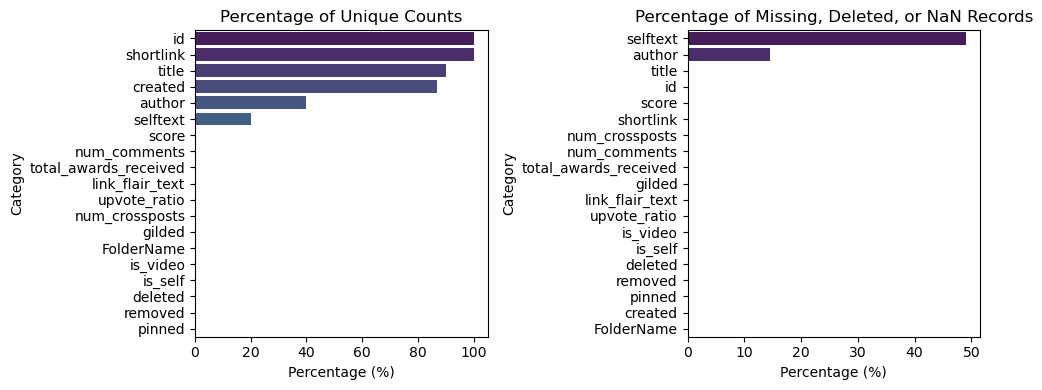

In [15]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Percentage of Unique Counts for Each Categorical Value
unique_counts = df.nunique()
percentage_unique = (unique_counts / len(df)) * 100
percentage_unique = percentage_unique.sort_values(ascending=False)
sns.barplot(ax=axes[0], x=percentage_unique.values, y=percentage_unique.index, palette="viridis")
axes[0].set_title("Percentage of Unique Counts")
axes[0].set_xlabel("Percentage (%)")
axes[0].set_ylabel("Category")

# Plot 2: Percentage of Missing, Deleted, or NaN Records
missing_deleted_nan = df.isin(["[removed]", "[deleted]", "NaN"]).sum() / len(df) * 100
missing_deleted_nan = missing_deleted_nan.sort_values(ascending=False)
sns.barplot(ax=axes[1], x=missing_deleted_nan.values, y=missing_deleted_nan.index, palette="viridis")
axes[1].set_title("Percentage of Missing, Deleted, or NaN Records")
axes[1].set_xlabel("Percentage (%)")
axes[1].set_ylabel("Category")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

* **Author**: This is the most important field in our study, as we focus on each account's track record. We have 585k unique authors, i.e. 2.1 posts per non-deleted author. Some authors deleted their accounts before the information was scraped into the dataset, so we dont have their names (15% of total records).  However, it would be unwise to delete such records, as arguments and sentiment expressed by such authors who chose to remove their accounts at a later stage did affect other participants. Moreover, their posts will still be useful in our NLP modelling, so we should keep them and treat it as a separate very prolific author that prefers to stay anonimous.  Maybe there are reasons for that, we shall see later in the study.  

* **Self-text**.  This is a very important field for further NLP analysis of the text.  We have a problem here, as the field selftext is often missing or has no meaningful value. 597k of such fields have been removed by the moderators.   **Only 21% of all rows (297k ) have long form meaningful text** that can be analysed.  This is disappointing, much less than the size of the dataset, but still acceptable. 

* **Title**: On the other hand, the title of the text contains some useful information, too.  It might be short, maybe just one sentence, but it may clearly indicate sentiment or attitude. All of our 1.5m records do have such non-null rows, and 1.35m of them are unique. 

In [16]:
# Lets look at the number of unique values in our object columns
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name, unique_values=unique_values))

Feature 'id' has '1500797' unique values
Feature 'author' has '596401' unique values
Feature 'created' has '1305521' unique values
Feature 'pinned' has '1' unique values
Feature 'removed' has '2' unique values
Feature 'deleted' has '2' unique values
Feature 'is_self' has '2' unique values
Feature 'is_video' has '2' unique values
Feature 'title' has '1350669' unique values
Feature 'link_flair_text' has '373' unique values
Feature 'upvote_ratio' has '101' unique values
Feature 'score' has '7473' unique values
Feature 'gilded' has '45' unique values
Feature 'total_awards_received' has '540' unique values
Feature 'num_comments' has '2555' unique values
Feature 'num_crossposts' has '58' unique values
Feature 'selftext' has '303241' unique values
Feature 'shortlink' has '1500797' unique values
Feature 'FolderName' has '14' unique values


Let's look at the authors with the highest score:

In [17]:
df.sort_values(by='score').tail(5).T

,880623,712961,872847,780553,711840
id,l881ia,l6x130,l846a1,l78uct,l6wu59
author,keenfeed,does-it-mater,DeepFuckingValue,DeepFuckingValue,vrweensy
created,2021-01-29 23:40:59,2021-01-28 13:49:11,2021-01-29 21:04:45,2021-01-28 21:06:23,2021-01-28 13:40:34
pinned,0,0,0,0,0
removed,0,0,0,0,0
deleted,0,0,0,0,0
is_self,0,1,0,0,0
is_video,0,0,0,0,0
title,It’s treason then,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,GME YOLO month-end update — Jan 2021,GME YOLO update — Jan 28 2021,UPVOTE so everyone sees we got SUPPORT
link_flair_text,Meme,Discussion,YOLO,YOLO,News


Now I will look at the length of text in various columns with text, and look at the distribution of the length of the posts:

In [18]:
# Creating a new column 'word_count' that will calculate the total number of words in columns "selftext" and "title"
df['word_count_selftext'] = df['selftext'].str.split().str.len()
df['word_count_title'] = df['title'].str.split().str.len()

In [19]:
# Having a look at the distribution of word counts in selftext column:
df['word_count_selftext'].value_counts()
# df['word_count_selftext'].mean()

word_count_selftext
1       1193828
2          3347
3          3011
4          2295
5          2132
         ...   
4151          1
1507          1
2607          1
2841          1
2114          1
Name: count, Length: 2849, dtype: int64

Observation: The longest posts have length of words between 2000-4000 words per post. However, a majority of posts have only one word (1,193,828 posts!). Such words mostly include [deleted], [removed[, [nan], [NaN]. This is not very informative, unless the sentiment is expressed in other fields, such as the "title" or flair" fields. 

In [20]:
# Having a look at the distribution of word counts in selftext column:
df['word_count_title'].value_counts()
#df['word_count_title'].median()
#df['word_count_title'].mean()

word_count_title
4      134115
5      132113
6      121548
3      116921
7      109902
        ...  
85          1
82          1
86          1
112         1
143         1
Name: count, Length: 87, dtype: int64

The title field is short, but important indicator of sentiment. There are many more rows with a meaningful text in that field, as we have seen before. The average length of the title field is 10 words. The majority of the post titles are very short, 4-7 words, but there are longer titles, up to 143 words in length. 

Let's look at all those messages that have been removed by the moderators.  They have '1' in the column 'removed'.

In [21]:
removed= df['removed'].value_counts()
df['removed'].value_counts()

removed
1    1007815
0     492982
Name: count, dtype: int64

A huge percentage of the original posts (934k!) have been removed by the moderators = 62% of the starting total or an incredible 0.9m posts!  Let's look closer at the removed posts.  Maybe there was a good reason why they have been removed? 

so, >70% of rows flagged as 'removed' have no values for 'selftext', a field that we need for our textual analysis. Let's have a look at what kind of text we have in the rows that have non-null values:  

In [22]:
# Filter out rows based on the conditions - 1) removed & 2) no selftext
temp_df = df[(df['removed'] != 1) & (~df['selftext'].isin(["[removed]", "[deleted]", "NaN"]))]

# Reset the index of the filtered DataFrame
temp_df.reset_index(drop=True, inplace=True)

temp_df.describe()


,created,pinned,removed,deleted,is_self,is_video,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts,word_count_selftext,word_count_title
count,492926,492926.0,492926.0,492926.0,492926.000000,492926.000000,492926.000000,492926.000000,492926.000000,492926.000000,492926.000000,492926.000000,492926.000000,492926.000000
mean,2021-05-10 09:12:47.168919552,0.0,0.0,0.0,0.653210,0.020681,0.801655,217.417758,0.028394,1.310761,48.326944,0.071246,106.356398,10.518697
min,2021-01-01 00:05:17,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2021-03-01 00:14:03.500000,0.0,0.0,0.0,0.000000,0.000000,0.670000,2.000000,0.000000,0.000000,3.000000,0.000000,1.000000,5.000000
50%,2021-03-30 14:44:10,0.0,0.0,0.0,1.000000,0.000000,0.860000,8.000000,0.000000,0.000000,7.000000,0.000000,34.000000,8.000000
75%,2021-07-09 12:17:59,0.0,0.0,0.0,1.000000,0.000000,0.960000,31.000000,0.000000,0.000000,16.000000,0.000000,123.000000,13.000000
max,2021-12-31 23:57:04,0.0,0.0,0.0,1.000000,1.000000,1.000000,299489.000000,292.000000,11491.000000,99346.000000,83.000000,14410.000000,140.000000
std,NaN,0.0,0.0,0.0,0.475949,0.142313,0.195164,2680.405611,0.670890,34.140030,915.957875,0.721614,242.735397,8.375609


1,008K rows have been tagged as "removed" by moderators. This is a stunning 2/3 of our dataset.  Around 75% of such 'removed" rows have no selftext.   

Only 310k of such "removed" rows have self text in them, so they present an interest to us. It is quite likely that the quality of comments in such rows was low, spamming the air.  Some of the records I manually reviewed talk about unrelated issues (such as student debt troubles, property transactions, venting out emotions, etc.) and it is understandable that moderators chose to remove such posts.  However, these rows also include some relevant comments on the market. <br> <br>I decided to keep the rows tagged 'removed' . 

Checking the posts by specific authors 

### Checking for null values

In [23]:
# summing all null values in the whole dataset
df.isna().sum()

id                            0
author                        0
created                       0
pinned                        0
removed                       0
deleted                       0
is_self                       0
is_video                      0
title                         0
link_flair_text          188285
upvote_ratio                  0
score                         0
gilded                        0
total_awards_received         0
num_comments                  0
num_crossposts                0
selftext                      0
shortlink                     0
FolderName                    0
word_count_selftext           0
word_count_title              0
dtype: int64

Observation: some authors chose to leave their posts uncategorised, i.e link_flair_text = NULL.  We should fill in those rows to remove NULL values:

In [24]:
# Replace NULL values with "none"
df['link_flair_text'].fillna("none", inplace=True)

### Duplicates removal

In [25]:
# Check for duplicate rows:
dupl=df.duplicated().sum()
print(f"The duplicates are {dupl:.2f}% of total rows")

The duplicates are 0.00% of total rows


In [26]:
# sanity check - to be deleted later. Just for convenience here. No empty titles
df[df['title'] == '']

,id,author,created,pinned,removed,deleted,is_self,is_video,title,link_flair_text,...,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,shortlink,FolderName,word_count_selftext,word_count_title


On the first look it all seems ok, no duplicated rows. However, under the hood, there are some duplicates as I show below. 

Let's look at rows where the title of the post is identical and the author is identical, too.  This filter is designed to catch all those accounts that reposted identical content several times, on different dates or in different channels:

In [27]:
# Filtering rows that have the same title and the same author:
author_title_dup = df.duplicated(subset=['author', 'title']).value_counts().T
author_title_dup

False    1438762
True       62035
Name: count, dtype: int64

So, we have 62k rows with where the author and the title are identical. Some of them will need to be removed. Let's see what's inside these rows:

In [28]:
df[df.duplicated(subset=['author', 'title'], keep=False)].sort_values(by='title').head(2)

,id,author,created,pinned,removed,deleted,is_self,is_video,title,link_flair_text,...,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,shortlink,FolderName,word_count_selftext,word_count_title
29420,lqwut7,[deleted],2021-02-23 23:44:33,0,1,1,1,0,!,💎🙌,...,2,0,0,2,0,[deleted],https://redd.it/lqwut7,gme,1,1
624957,l33h2p,[deleted],2021-01-23 02:47:00,0,1,1,0,0,!,Meme,...,1,0,0,0,0,[deleted],https://redd.it/l33h2p,wallstreetbets,1,1


In [29]:
# Calculating % of rows that are duplicate FOR TITLE:
author_title_dup_percentage = author_title_dup[1] / df.shape[0] * 100
print(f"The duplicate rows by title and author are {author_title_dup_percentage:.2f}% of total rows")

The duplicate rows by title and author are 4.13% of total rows


There are 62,035 duplicate posts by title. Most of them have **exactly the same content**, but have been posted to several different subreddits by certain energetic redditors. For example, a user "Wallstreetdrive" posted exactly the same title on the stock ticker SNDL on 7 April 2021 at 21:46:35, 21:52:37, 21:53:29 and 21:57:26, i.e. four identical posts within 11 minutes, all in different subreddits.  Although such duplicates certanly signal certain strength of emotions and sentiment, they dont carry additional signal for our ML study, as the text is exactly the same, the date is the same, and the author is the same. If some authors choose to spam the channel 3-4x times more energetically than the others it does not mean we should assign higher weight to their signal.  

Therefore, I dropped all but first instances of the duplicate columns contained in this filter:

In [30]:
# Removing duplicates based on 'author' and 'title' columns
# Create a boolean to identify duplicates, keeping the first instance
dupl = df.duplicated(subset=['author', 'title'], keep='first')

# Invert the boolean to select the rows that are not duplicates
df = df[~dupl]

# Reset the index of the filtered DataFrame
df.reset_index(drop=True, inplace=True)

In [31]:
# Performing similar analysis for a combination of 'author' and 'selftext':
author_selftext_dup = df.duplicated(subset=['selftext', 'title']).value_counts().T
author_selftext_dup

False    1380137
True       58625
Name: count, dtype: int64

In [32]:
df[df.duplicated(subset=['selftext', 'title'], keep=False)].sort_values(by='title').head(2)

,id,author,created,pinned,removed,deleted,is_self,is_video,title,link_flair_text,...,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,shortlink,FolderName,word_count_selftext,word_count_title
471213,lc49gm,HStG_0627,2021-02-04 01:41:03,0,1,0,1,0,!,none,...,1,0,0,0,0,[removed],https://redd.it/lc49gm,robinhoodpennystocks,1,1
171052,mnjcrc,Same-Tour9465,2021-04-09 15:13:23,0,0,0,0,0,!,Knowledge,...,38,0,0,1,0,nan,https://redd.it/mnjcrc,gme,1,1


In [33]:
# Calculating % of rows that are duplicate for SELFTEXT:
author_selftext_dup_percentage = author_selftext_dup[1] / df.shape[0] * 100
print(f"The duplicate rows by title and author are {author_selftext_dup_percentage:.2f}% of total cleaned remaining rows")


The duplicate rows by title and author are 4.07% of total cleaned remaining rows


Again, I see duplicate posts here, identical title and the same date, they might be posted by various accounts, but all within a short period of time.  For example, a message with the following content was posted 3 times on 28 Jan 2021 at 14:13:10, 15:09:25 and 15:17:58:

"!!! CHAMATH, Please open your own trading platform & I guarantee all of us that just got screwed over by RH & other trading platforms that are manipulating the market today will come aboard!🙏"

Two of these were posted to wsb subreddit, and one more at the r/stockmarket. The accounts that posted this **have different authors**, but given that they have been posted on the same day with identical message indicates presence of a bot or a coordinated spamming or influencing campaign.  

I decided to delete such rows duplicate, keeping only first instance, as they only create noise.

In [34]:
#I am removing duplicates based on 'selftext', 'title' and 'date' columns.

# In order to remove posts that were posted on the same date but at different time I need to create a new column "Date" (without timestamp):
df['date'] = pd.to_datetime(df['created']).dt.date

# Convert the "Date" column back to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by 'comments' column in descending order
df.sort_values(by='num_comments', ascending=False, inplace=True)

# Drop duplicates based on 'selftext', 'title', and 'date', keeping the first (highest comments) instance
df.drop_duplicates(subset=['selftext', 'title', 'date'], keep='first', inplace=True)

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

In [35]:
# df.info()

I have 1.41m roes left after deleting the duplicates.  This is still a good number. 

----
# 4. EDA

## Univariate

In [36]:
cont_var=list(df.select_dtypes(exclude='object'))
cont_var

['created',
 'pinned',
 'removed',
 'deleted',
 'is_self',
 'is_video',
 'upvote_ratio',
 'score',
 'gilded',
 'total_awards_received',
 'num_comments',
 'num_crossposts',
 'word_count_selftext',
 'word_count_title',
 'date']

### Distribution of rows by subreddits

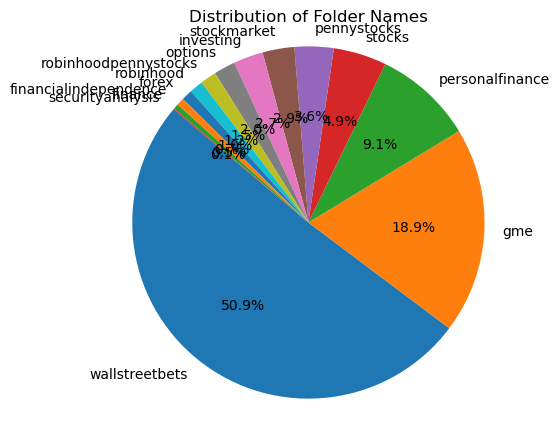

In [37]:
# Create a chart with distribution of rows by subreddits in a shape of a pie chart

# Calculate the value counts for 'FolderName' column
folder_counts = df['FolderName'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(folder_counts, labels=folder_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Folder Names')
plt.show()

### Group by Date

In [38]:
# Group by the 'Date' column and aggregate columns
df_agg_by_date = df.groupby([df['created'].dt.date]).agg({
    'id':'count', 
    'score': 'mean',
    'num_comments':'sum'
}).reset_index().rename(columns={
    'id': 'total_count',
    'score': 'average_score',
    'num_comments': 'total_comments'
})

In [39]:
df_agg_by_date.head(5)

,created,total_count,average_score,total_comments
0,2021-01-01,1024,80.109375,48557
1,2021-01-02,1163,91.071367,19973
2,2021-01-03,1048,118.337786,33696
3,2021-01-04,1981,60.245331,42431
4,2021-01-05,2015,51.318114,46524


<Axes: xlabel='created'>

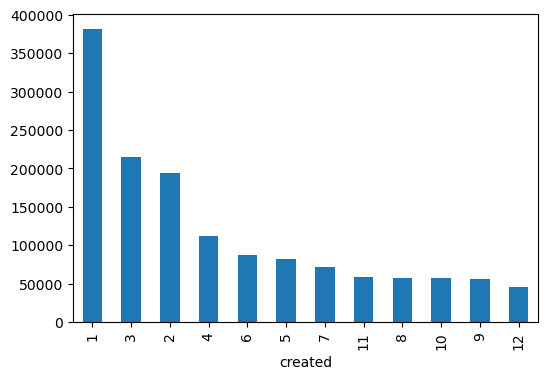

In [40]:
# Plot of post counts grouped by MONTH
df['created'].dt.month.value_counts().plot(kind='bar', figsize=(6,4))

Most postings happened in January 2021, but also in Februray and March. We need more detail on that . 

### History of postings in 2021

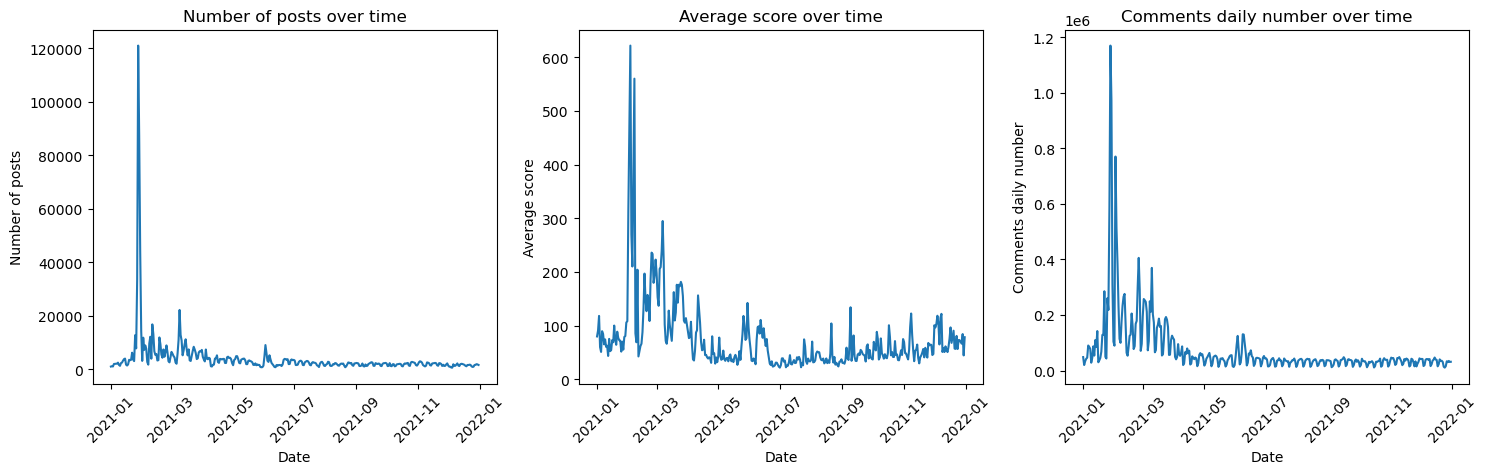

In [41]:
# Create a figure and a 1x3 subplot layout. ax is a list of AxesSubplots.
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(df_agg_by_date['created'], df_agg_by_date['total_count'])
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of posts')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Number of posts over time')

ax[1].plot(df_agg_by_date['created'], df_agg_by_date['average_score'])
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Average score')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Average score over time')

ax[2].plot(df_agg_by_date['created'], df_agg_by_date['total_comments'])
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Comments daily number')
ax[2].tick_params(axis='x', rotation=45)
ax[2].set_title('Comments daily number over time')

plt.tight_layout()
plt.show()


In [42]:
# Select the top 20 dates with the highest number of posts
top_20_dates_df = df_agg_by_date.sort_values(by='created', ascending=True).nlargest(20, 'total_count')
top_20_dates_df.reset_index(drop=True, inplace=True)

# Sort the top_20_dates_df by 'created' in ascending order
top_20_dates_df_sorted = top_20_dates_df.sort_values(by='created', ascending=True)
print("Top 20 Dates with the Highest Number of Posts (Ordered by Date):")
top_20_dates_df_sorted


Top 20 Dates with the Highest Number of Posts (Ordered by Date):


,created,total_count,average_score,total_comments
9,2021-01-25,12759,51.900071,260659
3,2021-01-27,33649,55.553271,586929
0,2021-01-28,121079,79.141098,1170079
1,2021-01-29,87139,80.823741,972485
2,2021-01-30,44084,106.007395,309345
6,2021-01-31,14274,108.611882,103890
12,2021-02-02,11827,466.567261,770629
16,2021-02-08,9647,85.955945,176070
10,2021-02-09,12159,69.256929,233404
5,2021-02-11,16798,42.866710,276091


In [43]:
total_count_sum = top_20_dates_df['total_count'].sum()
total_count_percentage = (top_20_dates_df['total_count'].sum() / len(df)) * 100
print(f'Total count of posts on 20 most active days is {total_count_sum} which is {total_count_percentage} percent of the total for the year 2021. \nThe period between 25 Jan and 15 March 2021 was the busiest.')

Total count of posts on 20 most active days is 484521 which is 34.19498128355832 percent of the total for the year 2021. 
The period between 25 Jan and 15 March 2021 was the busiest.


There was an abnormal spike in activity in late January 2021 which lasted for a short period of time. The number of posts was particularly high in a short period covering end of Jan 2021 to early February 2021.  If early January the avearge number of posts was approximately 1000-2000 per day, in the peak day Jan 28, 2021 the number of posts exceeded 130 thousands.  That was a truly anbnormal day.   

The activity and engagement (average score) remained elevated until the end of April 2021, and fully normalised in May 2021. We should keep in mind that that period in Q1'21 was very abnormal and consider it carefully. 

### Group by author

Creating a new dataframe where all the important columns are sorted by author.

In [44]:
# Group by the 'Date' column and aggregate columns
df_agg_by_author = df.groupby([df['author']]).agg({
    'id':'count', 
    'score': 'mean',
    'num_comments':'sum',
    'total_awards_received':'sum',
    'num_crossposts':'sum',
    'deleted':'sum',
    'removed':'sum',
    'upvote_ratio':'sum',
    'title':'count',
    'selftext':'count'
}).reset_index().rename(columns={
    'id': 'total_count',
    'score': 'average_score',
    'num_comments': 'sum_comments',
    'total_awards_received': 'sum_awards', 
    'num_crossposts': 'sum_crossposts',
    'deleted':'sum_deleted',
    'removed':'sum_removed',
    'upvote_ratio':'sum_upvoted',
    'selftext':'count_selftext'
})

In [116]:
# Creating a new field which measures an average number of comments per one post
df_agg_by_author['com_per_post']=df_agg_by_author['sum_comments']/ df_agg_by_author['total_count']

# Sorting the filtering results by the NUMBER OF COMMENTS PER POST
df_agg_by_author.sort_values(by="com_per_post", ascending=False).head(10)

,author,total_count,average_score,sum_comments,sum_awards,sum_crossposts,sum_deleted,sum_removed,sum_upvoted,title,count_selftext,com_per_post
513944,premier_,1,10882.000000,67871,306,2,0,0,0.97,1,1,67871.000000
434187,grebfar,8,14608.500000,432083,1303,19,0,0,6.88,8,8,54010.375000
571423,wallstreetboyfriend,4,37106.500000,167170,1750,16,0,0,3.83,4,4,41792.500000
207805,MotorizedDoucheCanoe,14,12865.428571,420556,2079,21,0,0,12.93,14,14,30039.714286
484241,mcuban,1,154745.000000,27424,2548,57,0,0,0.89,1,1,27424.000000
556526,theycallmeryan,3,19742.000000,80714,310,10,0,0,2.55,3,3,26904.666667
127388,GoBeaversOSU,7,2278.142857,149694,417,4,0,0,5.83,7,7,21384.857143
77925,Dan_inKuwait,5,3874.000000,96022,377,2,0,0,4.06,5,5,19204.400000
144552,ITradeBaconFutures,5,29687.200000,87137,1119,12,0,2,4.68,5,5,17427.400000
303524,Stylux,7,11505.142857,91648,571,24,0,0,6.33,7,7,13092.571429


The table above shows the top 10 accounts by comments per post.  These are definitely the accounts that had the biggest engagements with the redditors. 

In [114]:
# Sorting the filtering results by the NUMBER OF COMMENTS
df_top_authors= df_agg_by_author.sort_values(by="sum_comments", ascending=False).head(100)
df_top_authors.head(10)

,author,total_count,average_score,sum_comments,sum_awards,sum_crossposts,sum_deleted,sum_removed,sum_upvoted,title,count_selftext,com_per_post
226381,OPINION_IS_UNPOPULAR,581,2654.905336,7532139,31665,267,0,5,512.57,581,581,12964.094664
30463,AutoModerator,1906,79.013641,2078730,3401,41,0,9,1618.20,1906,1906,1090.624344
357199,[deleted],200001,19.274669,867328,19075,1393,129375,199456,179641.36,200001,200001,4.336618
434187,grebfar,8,14608.500000,432083,1303,19,0,0,6.88,8,8,54010.375000
207805,MotorizedDoucheCanoe,14,12865.428571,420556,2079,21,0,0,12.93,14,14,30039.714286
571423,wallstreetboyfriend,4,37106.500000,167170,1750,16,0,0,3.83,4,4,41792.500000
127388,GoBeaversOSU,7,2278.142857,149694,417,4,0,0,5.83,7,7,21384.857143
339987,VisualMod,157,178.885350,147040,441,18,0,3,125.69,157,157,936.560510
81995,DeepFuckingValue,17,106921.294118,141340,61723,340,0,0,15.74,17,17,8314.117647
583953,zjz,12,3713.833333,137665,876,6,0,2,10.76,12,12,11472.083333


The table above shows the top accounts by the total number of comments received. There is a significant overlap between these two top league tables. Finally, let's look at the top accounts by their avearge score per post:

In [120]:
# Sorting the filtering results by the AVERAGE SCORE
df_top_authors= df_agg_by_author.sort_values(by="average_score", ascending=False).head(100)
df_top_authors.head(10)

,author,total_count,average_score,sum_comments,sum_awards,sum_crossposts,sum_deleted,sum_removed,sum_upvoted,title,count_selftext,com_per_post
7274,84935,1,204095.000000,5846,1697,75,0,0,0.96,1,1,5846.000000
365686,always_plan_in_advan,1,167676.000000,3850,789,26,0,0,0.95,1,1,3850.000000
545739,string_beans,1,167635.000000,4274,885,30,0,0,0.92,1,1,4274.000000
484241,mcuban,1,154745.000000,27424,2548,57,0,0,0.89,1,1,27424.000000
114882,FlawlessBoltX,1,130886.000000,2411,861,30,0,0,0.88,1,1,2411.000000
580510,yellow_duck12,1,119786.000000,1085,136,7,0,0,0.97,1,1,1085.000000
209367,MrPostmanLookatme,1,112123.000000,4007,203,19,0,0,0.92,1,1,4007.000000
178223,Lansman,1,107107.000000,3332,571,12,0,0,0.93,1,1,3332.000000
81995,DeepFuckingValue,17,106921.294118,141340,61723,340,0,0,15.74,17,17,8314.117647
359146,_saucy_balloon,1,106819.000000,2132,812,47,0,0,0.93,1,1,2132.000000


Observations:  

1. There is a significant overlap between the first two groups of most influential authors.  Given that the dataset is so imbalanced between the top influencers and the rest, I need to filter the most influential authors into a separate category.
2. There were some authors that posted only once, but got amazing engagement (see the table above). Although such authors clearly added fuel to the fire I will not count such accounts as the top influencers, due to the one off nature of their interaction with the crowd.  

In the filter below I looked at what were the dates of all those posts when the score of some posts exceeded 90,000 per post. Most of them happened on 28-30 January 2021, during the GME short squeeze. 

In [124]:
extreme_engagement_per_post = df[df['score'] > 90000]
extreme_engagement_per_post.head(2)

,id,author,created,removed,deleted,is_self,is_video,title,link_flair_text,upvote_ratio,score,num_comments,selftext,shortlink,FolderName,word_count_selftext,word_count_title,date
108,lawubt,mcuban,2021-02-02 14:35:23,0,0,1,0,"Hey everyone, Its Mark Cuban. Jumping on to do...",Discussion,0.89,154745,27424,Lets Go !,https://redd.it/lawubt,wallstreetbets,3,15,2021-02-02
126,l78uct,DeepFuckingValue,2021-01-28 21:06:23,0,0,0,0,GME YOLO update — Jan 28 2021,YOLO,0.95,268017,24240,nan,https://redd.it/l78uct,wallstreetbets,1,7,2021-01-28


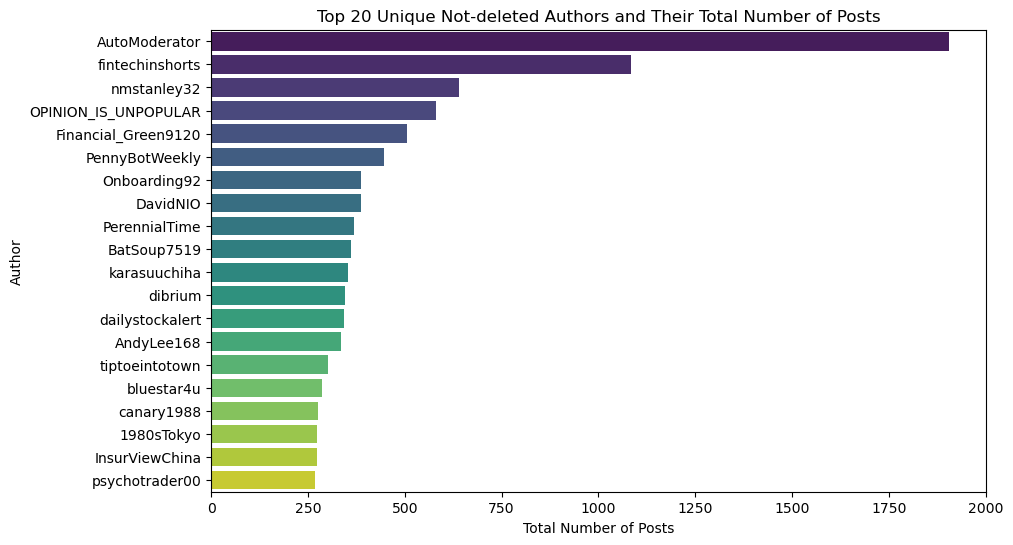

In [47]:
# Calculate the number of posts per author
author_counts = df['author'].value_counts()

# Exclude the count for author "[deleted]"
author_counts = author_counts.drop("[deleted]", errors='ignore')

# Get the top 20 authors and their post counts
top_20_authors = author_counts.head(20)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_authors.values, y=top_20_authors.index, palette="viridis")
plt.title("Top 20 Unique Not-deleted Authors and Their Total Number of Posts")
plt.xlabel("Total Number of Posts")
plt.ylabel("Author")
plt.show()


Observation: 
The average number of posts for the most active accounts should be enough to calculate their performance as "financial advisors".

### Selftext is missing for some prominent accounts 

In [48]:
#selecting rows with a specific value (name in this case)
df[df['author']=='DeepFuckingValue']

,id,author,created,pinned,removed,deleted,is_self,is_video,title,link_flair_text,...,gilded,total_awards_received,num_comments,num_crossposts,selftext,shortlink,FolderName,word_count_selftext,word_count_title,date
126,l78uct,DeepFuckingValue,2021-01-28 21:06:23,0,0,0,0,0,GME YOLO update — Jan 28 2021,YOLO,...,123,7928,24240,33,nan,https://redd.it/l78uct,wallstreetbets,1,7,2021-01-28
152,l846a1,DeepFuckingValue,2021-01-29 21:04:45,0,0,0,0,0,GME YOLO month-end update — Jan 2021,YOLO,...,63,4810,21087,30,nan,https://redd.it/l846a1,wallstreetbets,1,7,2021-01-29
166,lb6jld,DeepFuckingValue,2021-02-02 21:11:48,0,0,0,0,0,GME YOLO update — Feb 2 2021,YOLO,...,45,3944,18108,27,nan,https://redd.it/lb6jld,wallstreetbets,1,7,2021-02-02
257,lnqgz8,DeepFuckingValue,2021-02-19 21:05:55,0,0,0,0,0,GME YOLO update — Feb 19 2021,YOLO,...,144,9030,11577,53,nan,https://redd.it/lnqgz8,wallstreetbets,1,7,2021-02-19
264,msblc3,DeepFuckingValue,2021-04-16 20:20:13,0,0,0,0,0,GME YOLO update — Apr 16 2021 — final update,YOLO,...,292,11491,11338,83,nan,https://redd.it/msblc3,wallstreetbets,1,10,2021-04-16
329,lbykxg,DeepFuckingValue,2021-02-03 21:18:25,0,0,0,0,0,GME YOLO update — Feb 3 2021 – heads up gonna ...,YOLO,...,19,2753,9715,9,nan,https://redd.it/lbykxg,wallstreetbets,1,18,2021-02-03
479,mbpclz,DeepFuckingValue,2021-03-23 21:30:31,0,0,0,0,0,GME YOLO update — Mar 23 2021,YOLO,...,47,4047,7571,25,nan,https://redd.it/mbpclz,wallstreetbets,1,7,2021-03-23
484,m0q5bm,DeepFuckingValue,2021-03-08 21:08:31,0,0,0,0,0,GME YOLO update — Mar 8 2021,Hang In There,...,69,7016,7557,18,nan,https://redd.it/m0q5bm,wallstreetbets,1,7,2021-03-08
509,lt7v4w,DeepFuckingValue,2021-02-26 21:07:18,0,0,0,0,0,GME YOLO month-end update — Feb 2021,YOLO,...,32,3443,7311,21,nan,https://redd.it/lt7v4w,wallstreetbets,1,7,2021-02-26
585,l2x7he,DeepFuckingValue,2021-01-22 21:14:08,0,0,0,0,0,GME YOLO update — Jan 22 2021,YOLO,...,15,1327,6460,7,nan,https://redd.it/l2x7he,wallstreetbets,1,7,2021-01-22


Observations: 
 Keith Gill (writing under the name ""DeepF***Value""), one of the most prominent cheerleaders of the subreddit, posted 17 times in 2021. Unfortunately, none of his posts have self text ('nan' values only). He posted snapshot pictures of his portfolio instead (sharing the tickers, and the performance to day), and these posts received a lot of response. As performance of his portfolio skyrocketed the number of comments increased exponentially, too.  The NLP techniques will not be able to pick up on that. However, for select situations like this one, we can manually translate the content of the pictures into analysable taxt, so that his contriubtion is captured in the output, as well. I will need to check other top influenceers accounts to see if other highly influential accounts need to be corrected in the same manner.  

 One useful field is the 'link_flair_text' where authors can classify the topic of their post under a certain rubriq, "YOLO", or "Hang In There". The rubric of the post selected by the author carries a significant meaning, and should be also analysed, in addition to selftext and title.	  

In [49]:
# a hedge fund manager who posted deep dives, started posting in 2020. Published insiightful posts. 
df_agg_by_author[df_agg_by_author['author'] == 'Robertf1032010']

,author,total_count,average_score,sum_comments,sum_awards,sum_crossposts,sum_deleted,sum_removed,sum_upvoted,title,count_selftext,com_per_post
268559,Robertf1032010,2,4374.0,1332,79,4,0,0,1.77,2,2,666.0


In [50]:
# Just an average poster - 2 posts, not much following 
df_agg_by_author[df_agg_by_author['author'] == 'sadshark']

,author,total_count,average_score,sum_comments,sum_awards,sum_crossposts,sum_deleted,sum_removed,sum_upvoted,title,count_selftext,com_per_post
527682,sadshark,5,10.2,185,1,0,0,3,3.64,5,5,37.0


### Word Counts

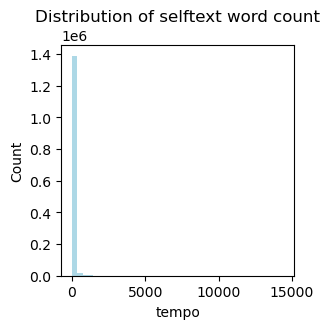

In [51]:
# Plot a histogram of selftext word counts
plt.figure(figsize=(3,3))
df.word_count_selftext.hist(bins=40, grid=False, color='lightblue')
plt.title('Distribution of selftext word count')
plt.xlabel('tempo')
plt.ylabel('Count')
plt.show()

Observation: The distriution is extremely skewed, with majority (>75% ) of posts having a very small number of words (deleted or removed ones).  But a very small percentage of authors posted very lengthy posts that skewed the right tail a lot. I will plot the distrition of selftext word count between 2 and 1000 words. We can see that majority of non-empty posts have between 2 and 200 words.   

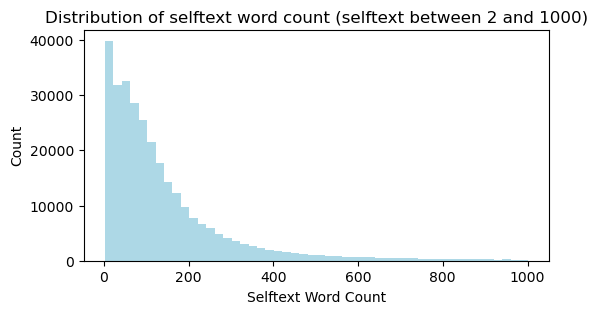

In [52]:
# Filtering out those rows where word count is less than 2:
decent_wordcount_selftext = df[(df['word_count_selftext'] >= 2) & (df['word_count_selftext'] <= 1000)]

# Plot the histogram
plt.figure(figsize=(6, 3))
decent_wordcount_selftext['word_count_selftext'].hist(bins=50, grid=False, color='lightblue')
plt.title('Distribution of selftext word count (selftext between 2 and 1000)')
plt.xlabel('Selftext Word Count')
plt.ylabel('Count')
plt.show()

Now we repeat the same exercise for the title word count. We can see similarly skewed distribution here:

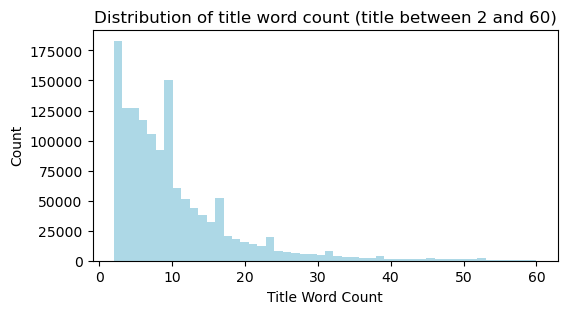

In [53]:
# Filtering out those rows where word count is less than 2:
decent_wordcount_title = df[(df['word_count_title'] >= 2) & (df['word_count_title'] <= 60)]

# Plot the histogram
plt.figure(figsize=(6, 3))
decent_wordcount_title['word_count_title'].hist(bins=50, grid=False, color='lightblue')
plt.title('Distribution of title word count (title between 2 and 60)')
plt.xlabel('Title Word Count')
plt.ylabel('Count')
plt.show()

### Score

More than half of posts received score of only 0 or 1, as I show in the graph below. To be considered a top 1% post by the number of likes (score) it should have received more than 1017 upvotes.  

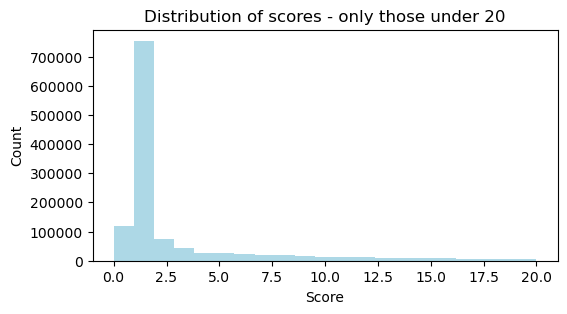

In [54]:
# Filtering out those rows where the value for score is small, between 0 and 20:
low_score = df[(df['score'] >=0) & (df['score'] <=20)]

# Plot the histogram for scores
plt.figure(figsize=(6, 3))
low_score['score'].hist(bins=21, grid=False, color='lightblue')
plt.title('Distribution of scores - only those under 20')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [55]:
# I calculate the threshold for top 1% of 'num_comments' in our dataframe:
threshold_score = df['score'].quantile(0.99)
print(threshold_score)

1017.0


### Number of comments

One third of the posts (500k) received zero comments. Next 400,000 posts received only 1 comment. However, the maximum for this field is 99,346 comments per one post. <br>Let's look at the distribution of comments for posts that received at least 1 comment (but less than 50).  We can see similarly right skewed distribution here, with majority of the posts (>50%) receiving one or less comments, and a very small minority of the posts receiving a very large number of comments. For a post to be considered among top 1% it should have received at least 158 comments: 

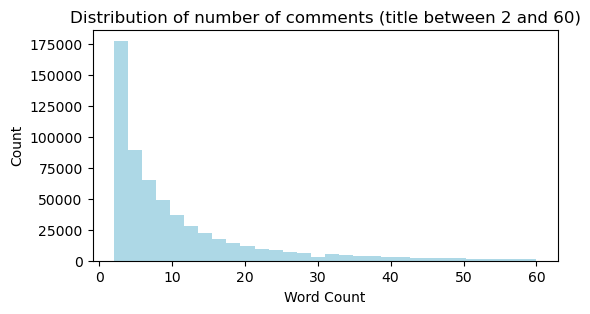

In [56]:
# Filtering out those rows where the value for num_comments is less than 2:
low_comments = df[(df['num_comments'] >=2) & (df['num_comments'] <= 60)]

# Plot the histogram
plt.figure(figsize=(6, 3))
low_comments['num_comments'].hist(bins=30, grid=False, color='lightblue')
plt.title('Distribution of number of comments (title between 2 and 60)')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()

In [57]:
# I calculate the threshold for top 1% of 'num_comments' in our dataframe:
threshold_num_comments = df['num_comments'].quantile(0.99)
print(threshold_num_comments)

158.0


### Number of crossposts

We see a very similar picture in the distribution of crossposts. Crossposting is not something that was popular, it seems: 99% of posts have 0 crossposts.  Anything above 0 is already in the top 1% of the distribution.  

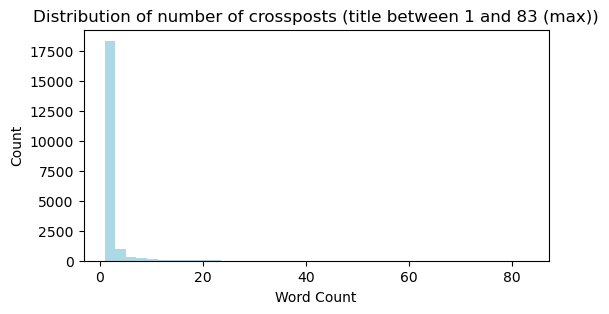

In [58]:
# Filtering out those rows where the value for num_comments is less than 1:
low_crossposts = df[(df['num_crossposts'] >= 1) & (df['num_crossposts'] <= 83)]

# Plot the histogram
plt.figure(figsize=(6, 3))
low_crossposts['num_crossposts'].hist(bins=40, grid=False, color='lightblue')
plt.title('Distribution of number of crossposts (title between 1 and 83 (max))')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()

In [59]:
# I calculate the threshold for top 1% of 'num_crossposts' in our dataframe:
threshold_num_crossposts = df['num_crossposts'].quantile(0.99)
print(threshold_num_crossposts)

1.0


In [60]:
correlation = df['num_crossposts'].corr(df['score'])
print(f"Correlation between 'num_crossposts' and 'score': {correlation}")

Correlation between 'num_crossposts' and 'score': 0.6957818757958973


I dont think this is a very important field: it is sparcely populated, and  it is only 70% correlated to the score of that post, so I will delete this column. 

In [61]:
df = df.drop('num_crossposts', axis=1)

### Pinned

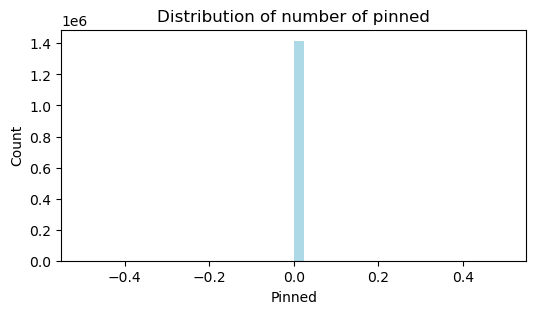

In [78]:
# Filtering out those rows where the value for num_comments is less than 1:
low_pinned = df[(df['pinned'] >= 0) & (df['pinned'] <= 10)]

# Plot the histogram
plt.figure(figsize=(6, 3))
low_pinned['pinned'].hist(bins=40, grid=False, color='lightblue')
plt.title('Distribution of number of pinned')
plt.xlabel('Pinned')
plt.ylabel('Count')
plt.show()

Pinned is another column that can be safely fropped: it contains only zeros. 

In [80]:
df = df.drop('pinned', axis=1)

## Bivariate Analysis

### Correlation matrix

I run correlations on 3 different dataframes - a) the original one, with individual posts, b) grouped by date and c) grouped by author.  

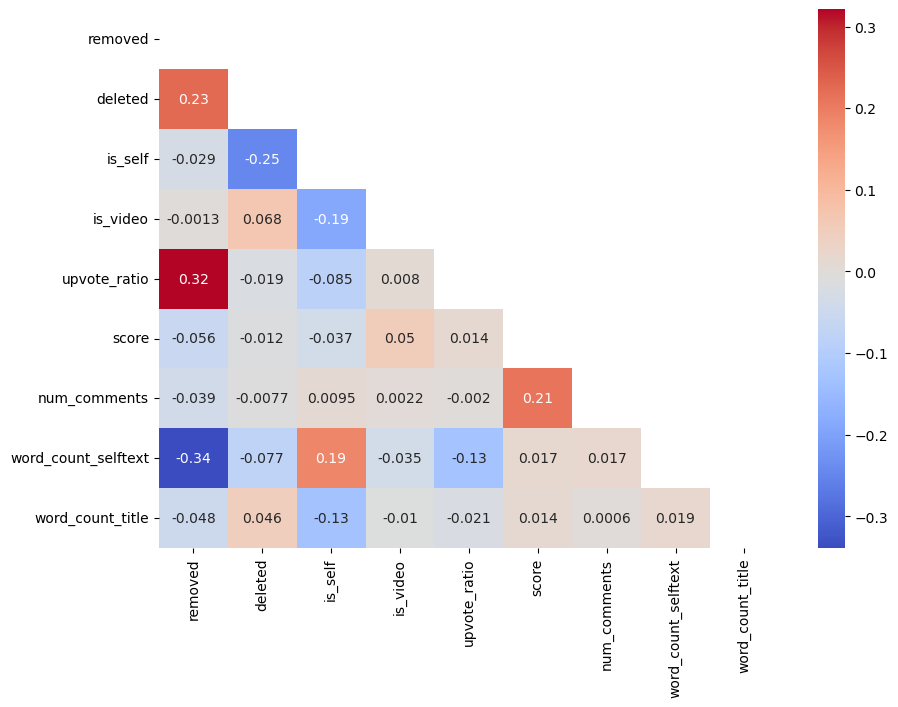

In [94]:
# Correlation of the variables in a heatmap for the dataframe by individual posts

numerical_cols = df.select_dtypes(include=[np.number])
corr_matrix = numerical_cols.corr()
matrix = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, mask=matrix, cmap='coolwarm')
plt.show()


'gilded' and 'total award received" seem to be highly correlated.  Both columns are not very significant, I am deleting the "gilded" column. 
After deleting the 'gilded" column I re-run the correlation matrix and I can see that the "total awards received" is also 0.6 correlated to "score". So, I am deleting the "total award" column as well. 

In [74]:
#df = df.drop('gilded', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416936 entries, 0 to 1416935
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1416936 non-null  object        
 1   author                 1416936 non-null  object        
 2   created                1416936 non-null  datetime64[ns]
 3   pinned                 1416936 non-null  int64         
 4   removed                1416936 non-null  int64         
 5   deleted                1416936 non-null  int64         
 6   is_self                1416936 non-null  int64         
 7   is_video               1416936 non-null  int64         
 8   title                  1416936 non-null  object        
 9   link_flair_text        1416936 non-null  object        
 10  upvote_ratio           1416936 non-null  float64       
 11  score                  1416936 non-null  int64         
 12  total_awards_received  14169

In [82]:
df = df.drop('total_awards_received', axis=1)

### Comments and score - pairwise

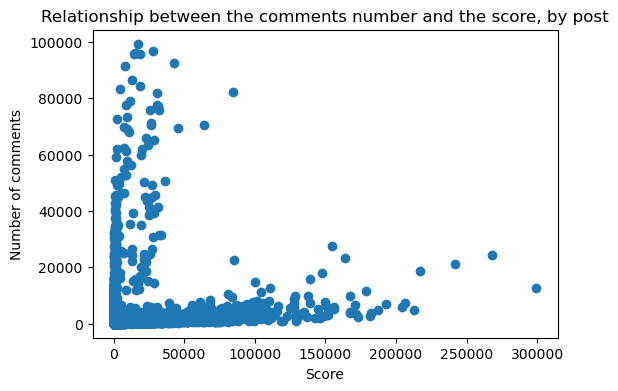

In [86]:
# scatterplot between commentsa nd score, by individual post
plt.figure()
plt.scatter(df['score'], df['num_comments'])
plt.title('Relationship between the comments number and the score, by post')
plt.xlabel('Score')
plt.ylabel('Number of comments')
plt.show()

We would expect some degree of relationships between these two variables: more impactful posts should theoretically receive both a lot of likes and a lot of comments. However, the correlation coefficient here is 0.2, not very high.  It is worth exploring this in more detail: possibly there might have been certain types of posts that received mostly comments, and some others mostly received upvotes/likes, it is hard to know.  The number of comments does not correlate well to any other numerical field. 


### Comments and posts counts - by date

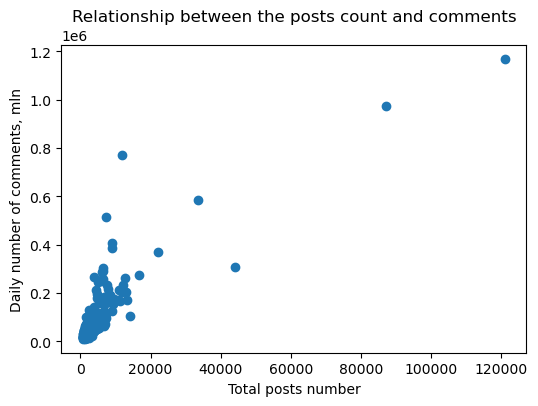

In [95]:
# scatterplot  - group BY DATE
plt.figure()
plt.scatter(df_agg_by_date['total_count'], df_agg_by_date['total_comments'])
plt.title('Relationship between the posts count and comments')
plt.xlabel('Total posts number')
plt.ylabel('Daily number of comments, mln')
plt.show()

As expected, there is relationship between the number of posts on that day, and the number of comments.  The chart below shows relationship between these two vaiables, if grouped by date.  There are two prominent outliers here - these are the two days in January 2021, when the GameStop short squeeze was happening, and this explain the enormous number of posts and comments on these two days.  

### Comments and posts - by author - excluding outliers

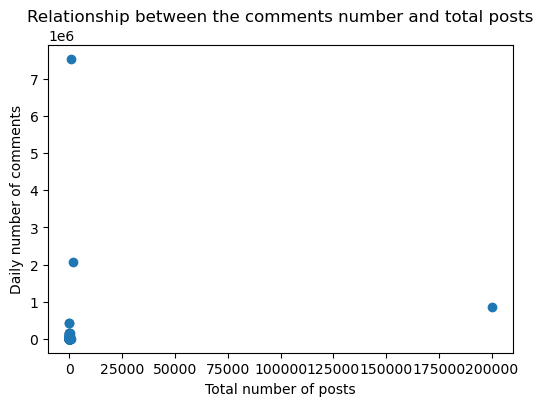

In [109]:
# Exclude top 3 outliers authors from the DataFrame - deleted posts, and two most active moderators who posted a lot
excluded_authors = ['OPINION_IS_UNPOPULAR', '[deleted]', 'AutoModerator']
df_top_authors_filtered = df_top_authors #[~df_top_authors['author'].isin(excluded_authors)]

# Scatterplot for the filtered DataFrame
plt.figure()
plt.scatter(df_top_authors_filtered['total_count'], df_top_authors_filtered['sum_comments'])
plt.title('Relationship between the comments number and total posts')
plt.xlabel('Total number of posts')
plt.ylabel('Daily number of comments')
plt.show()

I dont see a strong relationship here. Again, some authors posted just a few number of posts (under 100) and received an enormous number of comments.  Those were the real cheerleaders, it seems. 

Let's look at the top 10 accounts by impact (number of comments received per post)

### Top 10 accounts ranked by comments

In [106]:
# Sort the DataFrame by "comments_per_author" in descending order
df_top_authors_sorted = df_top_authors.sort_values(by='com_per_post', ascending=False)

# Print the summary of top accounts ranked from highest to lowest "comments_per_post"
print("Top Accounts Ranked by Comments Per Post:")
print(df_top_authors_sorted[['author', 'com_per_post']].head(20))


Top Accounts Ranked by Comments Per Post:
                      author  com_per_post
513944              premier_         67871
434187               grebfar         54010
571423   wallstreetboyfriend         41792
207805  MotorizedDoucheCanoe         30039
484241                mcuban         27424
556526        theycallmeryan         26904
127388          GoBeaversOSU         21384
77925           Dan_inKuwait         19204
144552    ITradeBaconFutures         17427
303524                Stylux         13092
226381  OPINION_IS_UNPOPULAR         12964
583953                   zjz         11472
284502              Shrubber         11242
81995       DeepFuckingValue          8314
76145              DNXPeeJay          7448
124083              Geko2012          7428
9144                   AOCnp          6398
493957               mwybert          5295
473740    liftingtailsofcats          4887
445396    idontevenlikedinos          4869


The top authors received 5-68 thousand comments per post! 

### Comments per post and average score by author

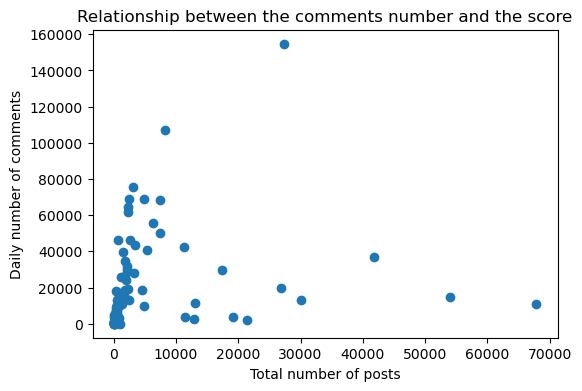

In [107]:
# scatterplot
plt.figure()
plt.scatter(df_top_authors['com_per_post'], df_top_authors['average_score'])
plt.title('Relationship between the comments number and the score')
plt.xlabel('Total number of posts')
plt.ylabel('Daily number of comments')
plt.show()

Observations: 

Account named OPINION_IS_UNPOPULAR has been one of the most prominent cheerleaders of the WSB subreddit. On the scatterplot above that account is a distant outlier being #1  both in terms of the number of posts (630) and the number of comments received (7.5mln)). 

We can see that there is no correlation between the number of posts and the number of comments received. There were two other accounts that received an enormous number of comments (>400k each), even though they were not the most prolofic posters. Perhaps their posts were very impressive and incited a lot of emotions. 

This group of the authors that generated the most of the comments should be carefully examined as they were probably the most influential ones.

### Top influencers

In [68]:
# Step 1: Calculate threshold for top 0.1% of 'num_comments' and 'id' count in df_top_authors
threshold_num_comments = df_top_authors['sum_comments'].quantile(0.5)
threshold_id_count = df_top_authors['total_count'].quantile(0.5)
threshold_score = df_top_authors['total_count'].quantile(0.5)

In [69]:
# Step 3: Select rows that meet either the top 1% threshold for 'num_comments' or 'id' count
selected_rows = df_top_authors[(df_top_authors['sum_comments'] >= threshold_num_comments) | (df_top_authors['total_count'] >= threshold_id_count)]

# Select rows that meet either the top 0.1% threshold for 'num_comments' or 'id' count.
selected_rows=selected_rows.sort_values(by=['sum_comments'], ascending=False)

### Removed category

## 5. Conclusion

To conclude this notebook, it involves data collection, cleaning and some preliminary exploration of dataset by going through EDA techniques in order to understand the data and plot meaningful insights. 

In my next notebook, I will be cleaning the text data to prepare it for text processing my machines.